In [2]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import matplotlib.pyplot as plt
import numpy as np
import pickle

from scripts.agents import QLearningAgent, SARSAAgent
from scripts.training import Trainer, trainingInspector, test_agent, plot_test_results
from scripts.tilecoding import QTable

### Top 3 hyperparameters for Q-Learning and SARSA

In [9]:
# Top 3 hyperparameters for Q-Learning and SARSA
qlearning_hyperparameter_list = [
    
    # Best performing hyperparameters
    {
        "num_episodes": 10000,
        "max_return": 500,
        "num_tiles_per_feature": 30,
        "num_tilings": 1,
        "learning_rate": 0.1,
        "tau_start": 10000,
        "tau_end": 0.1,
        "decay_type": "exponential",
        "frac_episodes_to_decay": 0.7
    },
    # Second best performing hyperparameters
    {
        "num_episodes": 10000,
        "max_return": 500,
        "num_tiles_per_feature": 20,
        "num_tilings": 1,
        "learning_rate": 0.1,
        "tau_start": 10000,
        "tau_end": 0.1,
        "decay_type": "exponential",
        "frac_episodes_to_decay": 0.7
    },
    # Third best performing hyperparameters
    {
        "num_episodes": 10000,
        "max_return": 500,
        "num_tiles_per_feature": 30,
        "num_tilings": 1,
        "learning_rate": 0.1,
        "tau_start": 1000,
        "tau_end": 0.1,
        "decay_type": "exponential",
        "frac_episodes_to_decay": 1
    },
    
]

sarsa_hyperparameter_list = [
    
    # Best performing hyperparameters
    {
        "num_episodes": 10000,
        "max_return": 500,
        "num_tiles_per_feature": 30,
        "num_tilings": 1,
        "learning_rate": 0.1,
        "eps_start": 1,
        "eps_end": 0.01,
        "decay_type": "linear",
        "frac_episodes_to_decay": 0.3
    },
    # Second best performing hyperparameters
    {
        "num_episodes": 10000,
        "max_return": 500,
        "num_tiles_per_feature": 20,
        "num_tilings": 1,
        "learning_rate": 0.1,
        "eps_start": 1,
        "eps_end": 0.01,
        "decay_type": "linear",
        "frac_episodes_to_decay": 0.5
    },
    # Third best performing hyperparameters
    {
        "num_episodes": 10000,
        "max_return": 500,
        "num_tiles_per_feature": 30,
        "num_tilings": 1,
        "learning_rate": 0.1,
        "eps_start": 1,
        "eps_end": 0.01,
        "decay_type": "linear",
        "frac_episodes_to_decay": 0.5
    }

]


## Helper functions

In [3]:
class ObsWrapper(gym.ObservationWrapper):

    def __init__(self, env: gym.Env, f):
        super().__init__(env)
        assert callable(f)
        self.f = f

        self.observation_space.high = f(env.observation_space.high)
        self.observation_space.low = f(env.observation_space.low)

    def observation(self, observation):
        return self.f(observation)

def episode_trigger(x):
    if x % 1000 == 0:
        return True
    return False

## Running experiments

In [4]:
env = gym.make('CartPole-v1', render_mode="rgb_array")
env = ObsWrapper(env,
                 lambda obs: np.clip(obs, -5, 5))
env = RecordVideo(
    env,
    video_folder="backups/cartpole-qlearning-visualizations",
    name_prefix="eval",
    episode_trigger=episode_trigger
)

qlearning_agent = QLearningAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=0
)

sarsa_agent = SARSAAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=0
)

trainer = Trainer()
qlearning_results = test_agent(env, qlearning_agent, trainer, qlearning_hyperparameter_list, num_experiments=5)
sarsa_results = test_agent(env, sarsa_agent, trainer, sarsa_hyperparameter_list, num_experiments=5)

env.close()

/home/lalit/my_venvs/rl_env/lib/python3.10/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /home/lalit/acads/DA6400/Assignment1/DA6400_RL_PA1/backups/cartpole-qlearning-visualizations folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
Training: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [05:28<00:00, 30.43it/s, Mean Score=217]


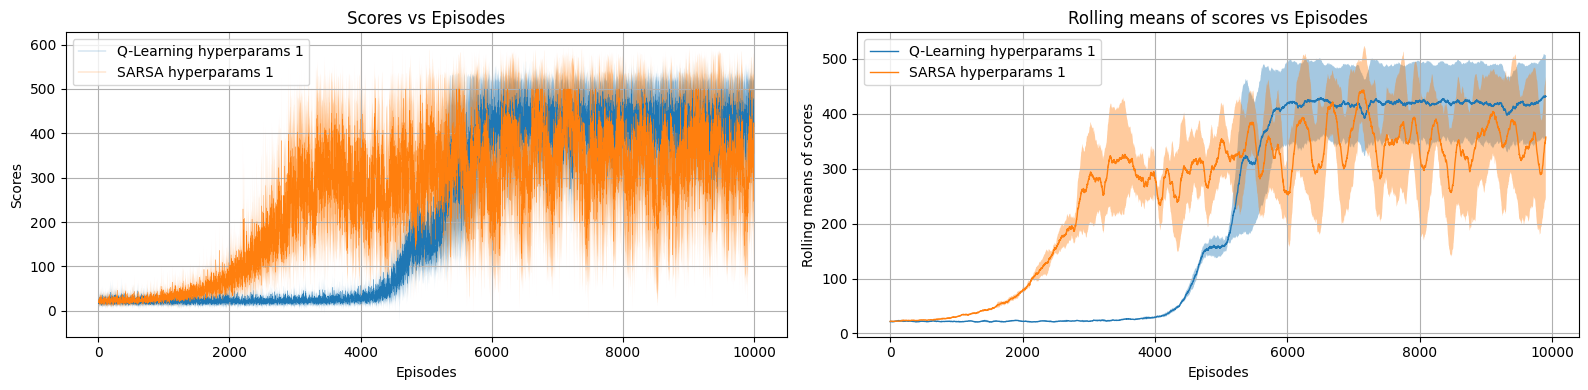

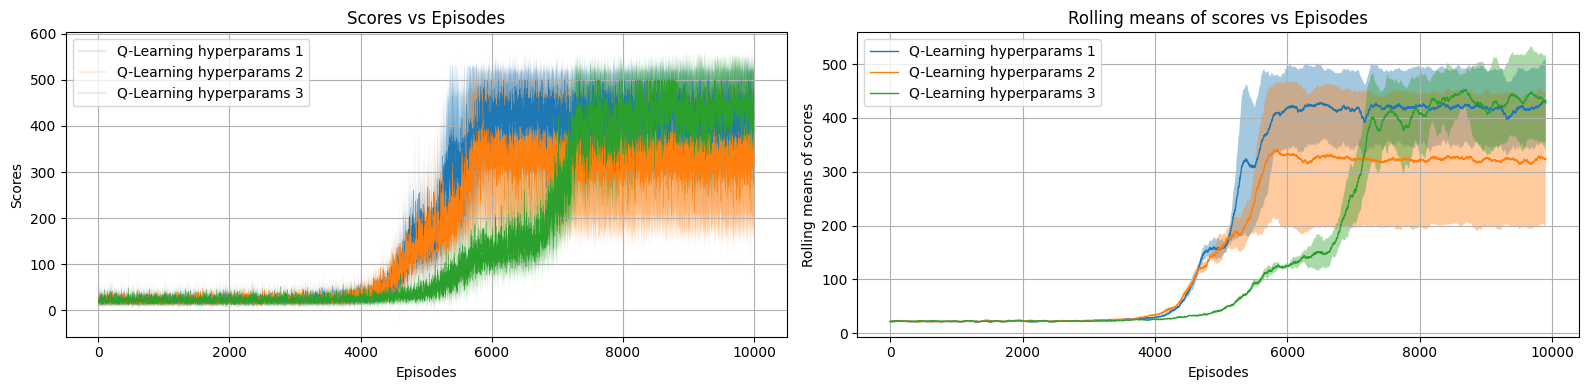

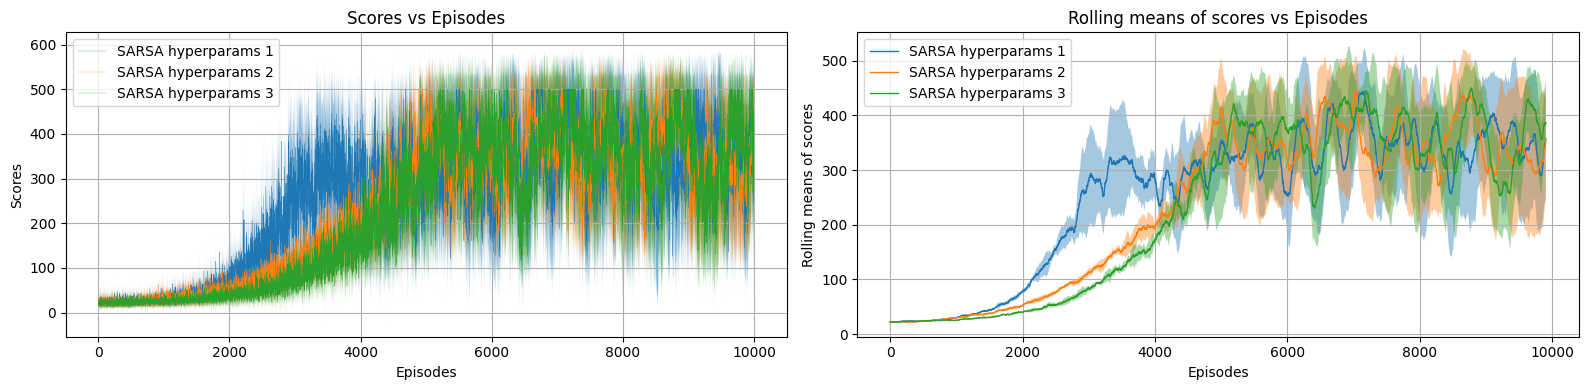

In [3]:
combined_results = qlearning_results + sarsa_results

with open("backups/cartpole-plots/cartpole_qlearning_results.pickle", 'wb') as handle:
    pickle.dump(qlearning_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open("backups/cartpole-plots/cartpole_sarsa_results.pickle", 'wb') as handle:
    pickle.dump(sarsa_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

plot_test_results(combined_results, [0, 3])
plt.savefig("backups/cartpole-plots/cartpole_combined.png")
plot_test_results(qlearning_results, [0, 1, 2])
plt.savefig("backups/cartpole-plots/cartpole_qlearning.png")
plot_test_results(sarsa_results, [0, 1, 2])
plt.savefig("backups/cartpole-plots/cartpole_sarsa.png")